In [16]:
import numpy as np
import pandas as pd
import sys
import os

# Add the parent directory to the sys.path
#  sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.dataset import preprocess
import matplotlib.pyplot as plt
import seaborn as sns




# Define your parameters
parse_dates = [['Date', 'Time']]
filename = "../data/raw/household_power_consumption.txt"  # Adjust the path to the text file
encode_cols = ['Month', 'DayofWeek', 'Hour']
bucket_size = "60T"
N_rows = 60000

# Call preprocess function
df = preprocess(N_rows, parse_dates, filename)
df.head()


total rows in the file:  2075260


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [20]:
 print(df.columns)  # 
df.describe()



Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,59995.000000,59995.000000,59995.000000,59995.000000,59995.000000,59995.000000,59995.000000
mean,1.667938,0.133842,241.126349,7.057405,1.284224,1.885274,7.181415
std,1.357748,0.118410,3.627930,5.722993,6.689584,7.714899,8.617926
min,0.194000,0.000000,224.680000,0.800000,0.000000,0.000000,0.000000
25%,0.394000,0.000000,238.720000,1.800000,0.000000,0.000000,0.000000
50%,1.426000,0.124000,241.410000,6.000000,0.000000,0.000000,0.000000
75%,2.442000,0.200000,243.725000,10.200000,0.000000,1.000000,17.000000
max,9.272000,0.862000,251.700000,40.400000,77.000000,78.000000,20.000000


/home/george/projects/Time-Series-ARIMA-XGBOOST-RNN/src/util.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  y = ts.resample(bucket).mean()


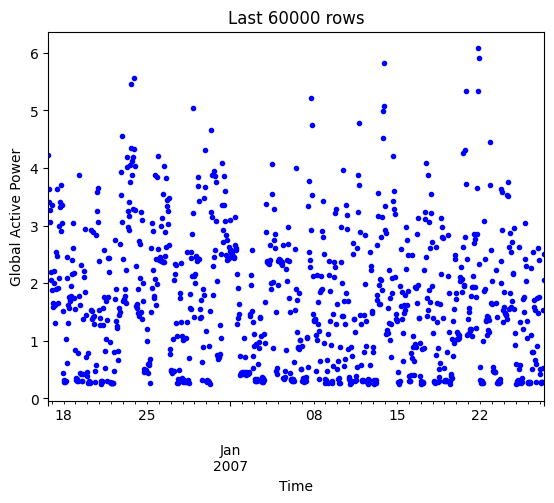

In [8]:
from src.util import bucket_avg
G_power=df["Global_active_power"]
#G_power_sort=G_power.sort_values('index')

df = pd.DataFrame(bucket_avg(G_power,bucket_size))
df.dropna(inplace=True)
df.Global_active_power.plot(style='b.')
plt.ylabel('Global Active Power')
plt.xlabel('Time')
plt.title("Last 60000 rows")
plt.savefig( 'EDA_2010.png', dpi=300)
plt.show()

total rows in the file:  2075260
(19000,)


/home/george/projects/Time-Series-ARIMA-XGBOOST-RNN/src/util.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  y = ts.resample(bucket).mean()


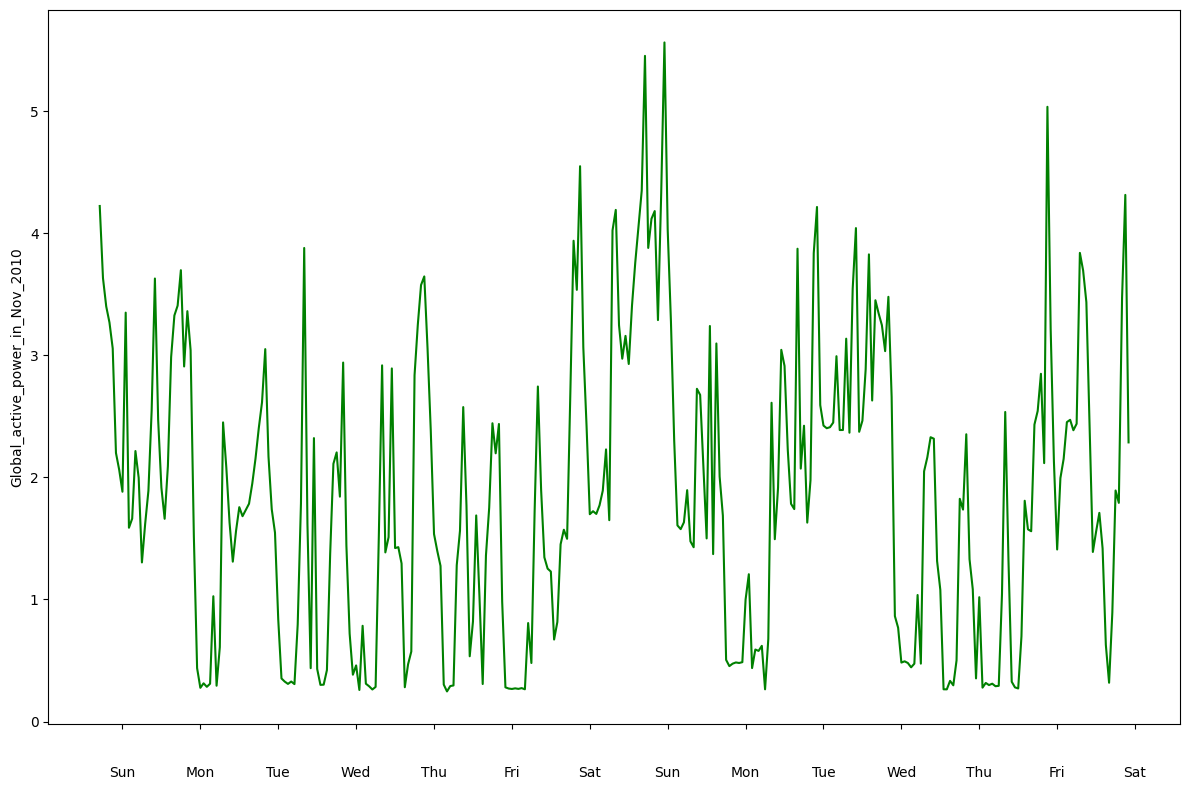

In [10]:
from src.plots import timeseries_plot
N_rows = 19000
df = preprocess(N_rows, parse_dates, filename)
G_power=df["Global_active_power"]
print(G_power.shape) # 21661 rows
df_G = pd.DataFrame(bucket_avg(G_power,bucket_size))
df_G.dropna(inplace=True)

# time series plot
ts_label='Global_active_power_in_Nov_2010'
timeseries_plot(df_G.Global_active_power,'g', ts_label)

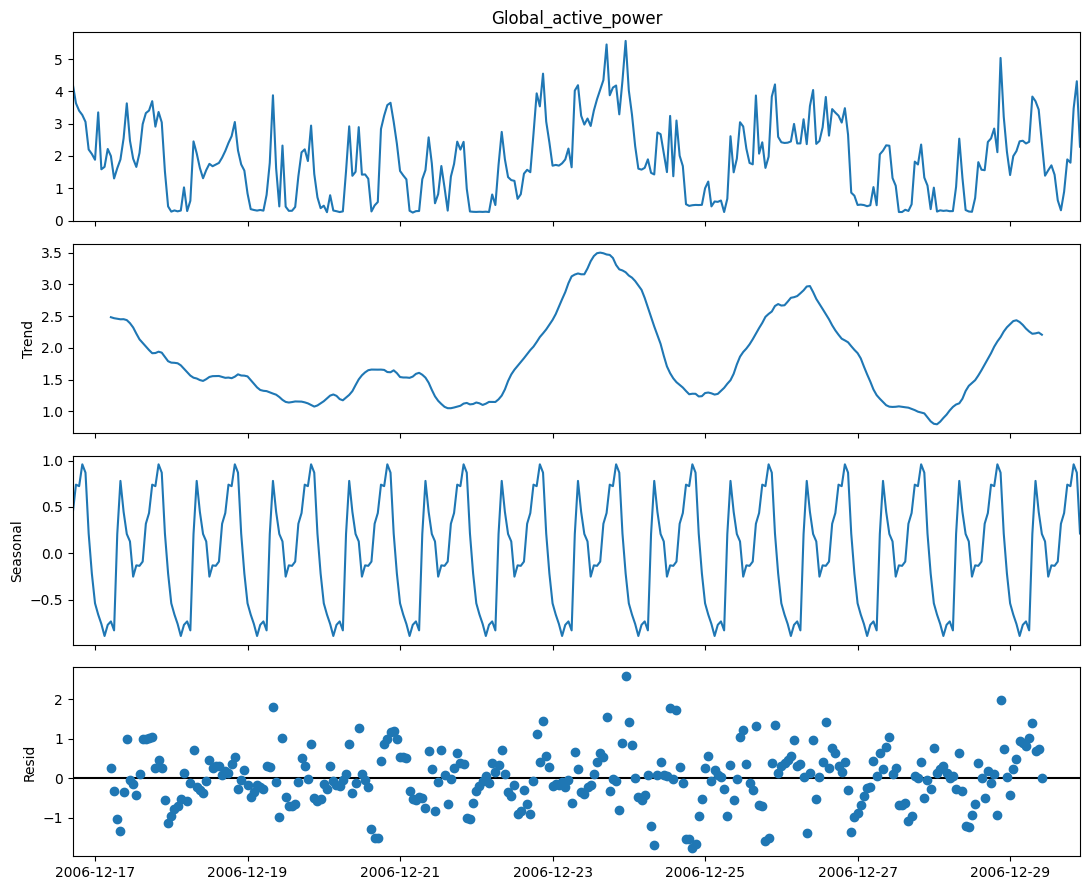

In [11]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_G.Global_active_power, model='additive')
fig = decomposition.plot()
plt.tight_layout()
plt.savefig( 'ts_decomposition_plot.png', dpi=300)
plt.show()

                     Global_active_power Time of Day        Date
datetime                                                        
2006-12-16 17:00:00             4.222889    17:00:00  2006-12-16
2006-12-16 18:00:00             3.632200    18:00:00  2006-12-16
2006-12-16 19:00:00             3.400233    19:00:00  2006-12-16
2006-12-16 20:00:00             3.268567    20:00:00  2006-12-16
2006-12-16 21:00:00             3.056467    21:00:00  2006-12-16


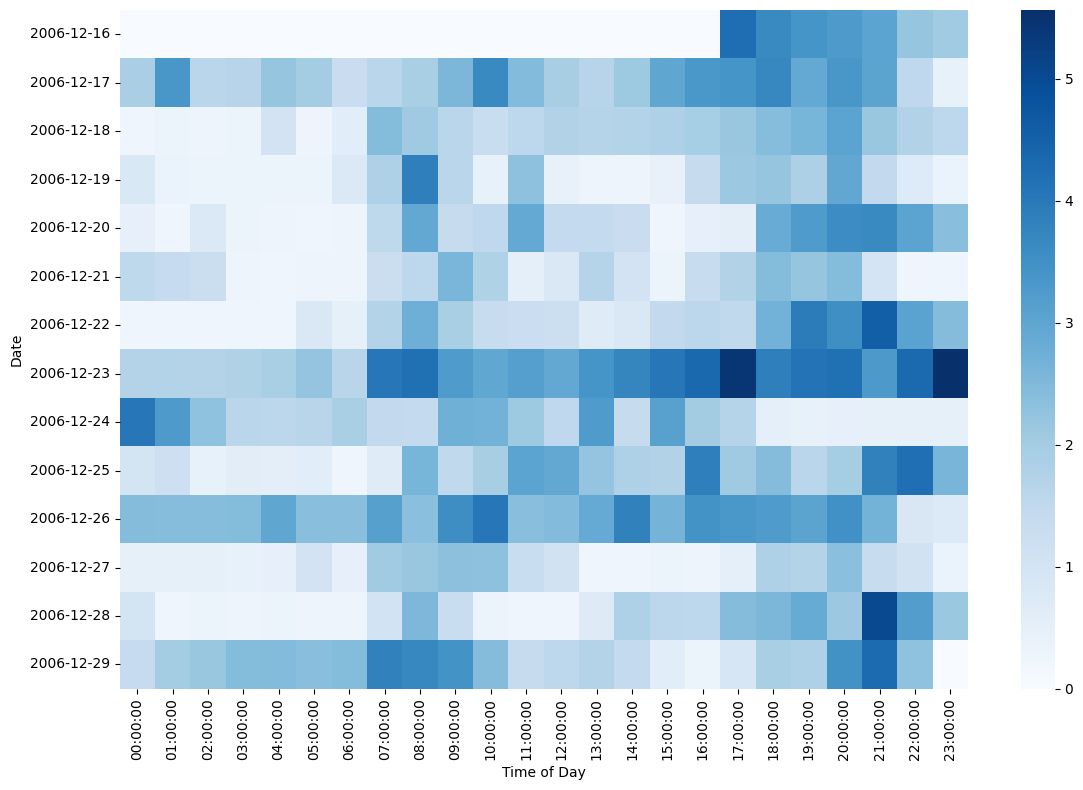

In [12]:
# heatmap
df_G['Time of Day'] = df_G.index.time
df_G['Date'] = df_G.index.date
print(df_G.head())
dfG_pivot = df_G.pivot_table(index="Date", columns="Time of Day",values='Global_active_power',fill_value=0)
dfG_pivot.head()
plt.figure(figsize=(12, 8))
sns.heatmap(dfG_pivot,cmap='Blues')
plt.tight_layout()
plt.savefig( 'date_time_power_heatmap.png', dpi=300)
plt.show()


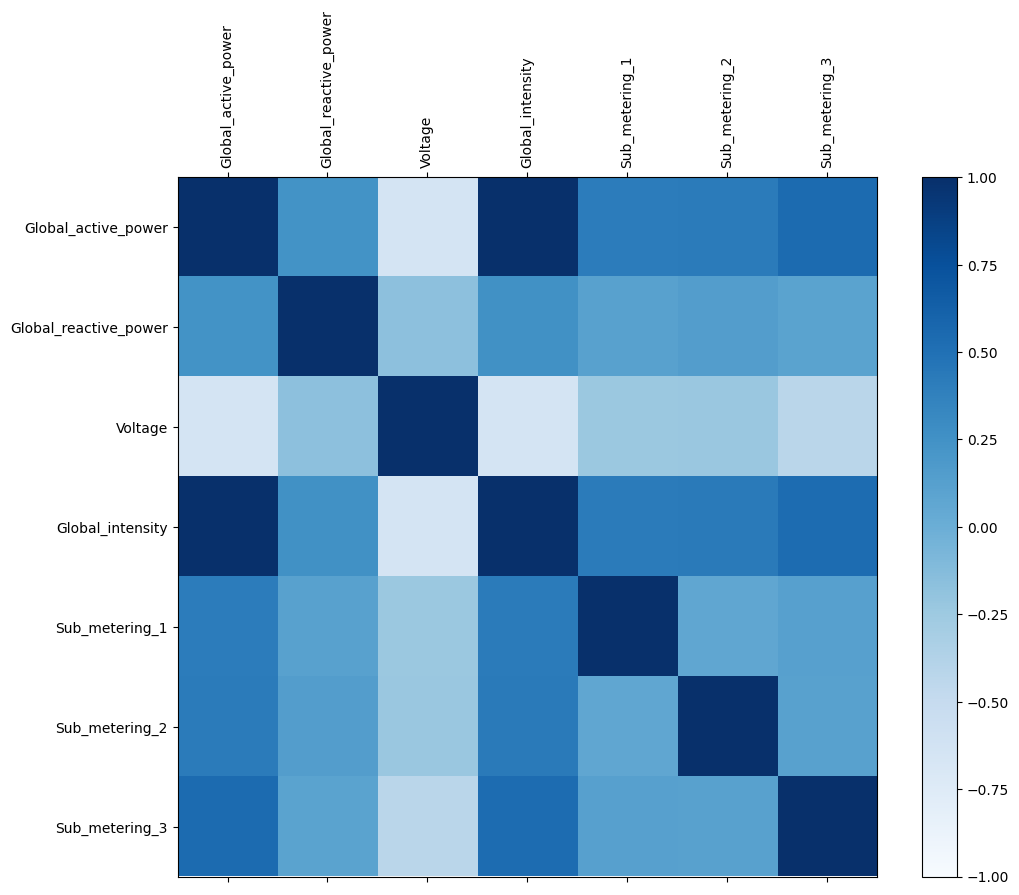

In [21]:
# correlation plot
names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap='Blues')
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90)
ax.set_yticklabels(names)
#plt.figure(figsize=(8,8))
plt.tight_layout()
plt.savefig('correlation.png', dpi=300)
plt.show()


Files in '../data/processed': ['xgb_forecasts.csv', 'xgb_predictions.csv', 'Feature Importance.csv']


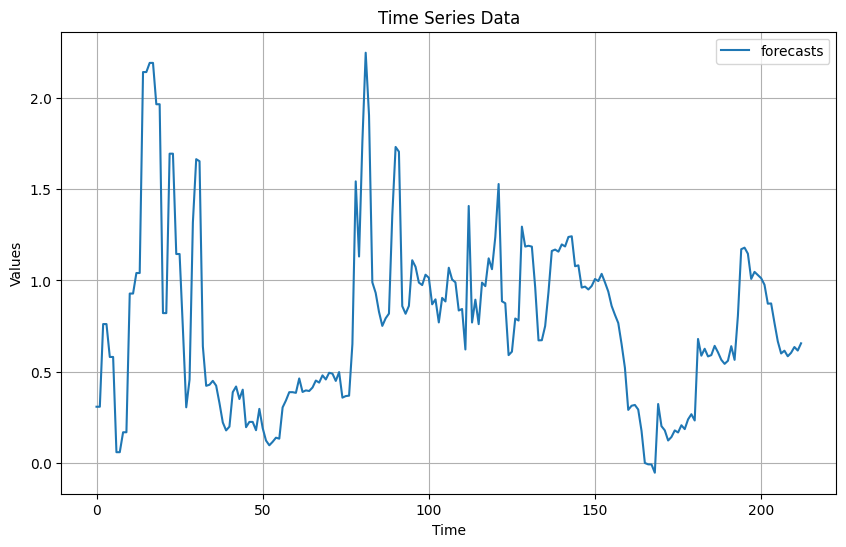

In [25]:
import sys
import os


# Check files in the data directory
print("Files in '../data/processed':", os.listdir("../data/processed"))

# Add the parent directory to the sys.path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd





# Define your parameters
filename = "../data/processed/xgb_forecasts.csv"
df=pd.read_csv(filename,header=0,
            delimiter=",")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()